读取数据，其中 train 的第 3854675 行似乎有问题，用 badline 参数略掉。读取用时 16 秒左右

In [3]:
import pandas as pd
train_df_raw = pd.read_csv("data/kddcup99_train.csv",on_bad_lines='skip',header=None)
test_df_raw = pd.read_csv("data/kddcup99_test.csv",on_bad_lines='skip',header=None)

train 3919781 rows × 42 columns

test 978649 rows × 42 columns

train[1,2,3,41] 是 categorical 数据，需要创建一个映射 map dict 保证前后一致，具体过程如下。这一部分的处理可以复用第一次作业中 bayes 相关的部分。

初步处理之后我们知道第 41 列是 attack 分类结果，在 attach types 文件中分类结果被归类到更少的 attack 类型。直觉上我们先做这一步归类，可能能简化过程，得到更好的效果。

训练中得知 test 集中还有一些不一样的category值，如 http_2784, aol

In [4]:
train_df = train_df_raw.copy()
test_df = test_df_raw.copy()

In [5]:
attack_types = pd.read_table("data/trainning_attach_types", header=None,delim_whitespace=True)

attack_dict = {attack_types[0][i]+'.':attack_types[1][i] for i in range(len(attack_types))}
# attack_dict

train_df[41] = train_df[41].replace(attack_dict)
test_df[41] = test_df[41].replace(attack_dict)
# train_df[41].describe()

In [6]:
map_dict = {}

for column in train_df.columns:
    if pd.api.types.is_object_dtype(train_df[column]):
        factorized_column, map = train_df[column].factorize()
        train_df[column] = factorized_column
        map_dict[column] = {map[i]:i for i in range(len(map))}

        _, map_t = test_df[column].factorize()
        # print([i for i in map_t if i not in map])

map_dict[2]['http_2784']=68
map_dict[2]['aol']=69
map_dict

{1: {'tcp': 0, 'udp': 1, 'icmp': 2},
 2: {'http': 0,
  'smtp': 1,
  'domain_u': 2,
  'auth': 3,
  'finger': 4,
  'telnet': 5,
  'eco_i': 6,
  'ftp': 7,
  'ntp_u': 8,
  'ecr_i': 9,
  'other': 10,
  'urp_i': 11,
  'private': 12,
  'ftp_data': 13,
  'pop_3': 14,
  'netstat': 15,
  'daytime': 16,
  'ssh': 17,
  'echo': 18,
  'name': 19,
  'whois': 20,
  'domain': 21,
  'mtp': 22,
  'remote_job': 23,
  'rje': 24,
  'ctf': 25,
  'supdup': 26,
  'link': 27,
  'systat': 28,
  'discard': 29,
  'time': 30,
  'gopher': 31,
  'X11': 32,
  'shell': 33,
  'login': 34,
  'imap4': 35,
  'nntp': 36,
  'uucp': 37,
  'IRC': 38,
  'netbios_dgm': 39,
  'sunrpc': 40,
  'courier': 41,
  'exec': 42,
  'bgp': 43,
  'csnet_ns': 44,
  'http_443': 45,
  'klogin': 46,
  'printer': 47,
  'netbios_ssn': 48,
  'nnsp': 49,
  'efs': 50,
  'hostnames': 51,
  'uucp_path': 52,
  'sql_net': 53,
  'vmnet': 54,
  'iso_tsap': 55,
  'netbios_ns': 56,
  'kshell': 57,
  'pop_2': 58,
  'Z39_50': 59,
  'ldap': 60,
  'urh_i': 61,
 

In [7]:
for column in test_df.columns:
    # print(column)
    if column in map_dict.keys():
        test_df[column] = test_df[column].replace(map_dict[column])

test_df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,0,0,0,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.00,0.00,0.0,0.0,0
1,0,0,0,0,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.00,0.00,0.0,0.0,0
2,0,0,0,0,184,124,0,0,0,0,...,10,1.0,0.0,0.10,0.00,0.00,0.00,0.0,0.0,0
3,0,0,0,0,239,1295,0,0,0,0,...,12,1.0,0.0,0.08,0.00,0.00,0.00,0.0,0.0,0
4,0,0,0,0,236,1228,0,0,0,0,...,14,1.0,0.0,0.07,0.00,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978644,0,0,0,0,284,2169,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.00,0.01,0.0,0.0,0
978645,0,0,0,0,0,234,0,0,0,0,...,255,1.0,0.0,0.07,0.05,0.07,0.01,0.0,0.0,0
978646,0,0,0,0,290,4017,0,0,0,0,...,255,1.0,0.0,0.05,0.05,0.05,0.01,0.0,0.0,0
978647,0,0,0,0,291,1862,0,0,0,0,...,255,1.0,0.0,0.03,0.05,0.03,0.01,0.0,0.0,0


In [8]:
# train_data = train_df.to_numpy()
# test_data = test_df.to_numpy()

In [9]:
train_features_raw, train_labels = train_df.iloc[:,:-1], train_df.iloc[:,-1]
test_features_raw, test_labels = test_df.iloc[:,:-1], test_df.iloc[:,-1]

以上我们完成数据处理，接下来探索 PCA

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.decomposition import IncrementalPCA

取 rank 为 5 完成下列代码，训练用时 30 s 左右

In [11]:
rank = 5
pca = IncrementalPCA(n_components=rank,)
train_features = pca.fit_transform(train_features_raw)
test_features = pca.transform(test_features_raw)
train_features

array([[-1.52995830e+03,  4.38746197e+04, -2.24983281e+01,
        -4.91368694e+02,  6.31303692e+01],
       [-1.54448362e+03,  8.30618361e+02, -2.16478604e+01,
        -4.89084223e+02,  6.35420713e+01],
       [-1.53965183e+03, -7.15385732e+02, -2.17055279e+01,
        -4.87413293e+02,  6.35343838e+01],
       ...,
       [-1.55984079e+03, -9.65370614e+02, -2.77390848e+01,
        -4.11113023e+02,  2.47984446e+02],
       [-1.55829130e+03,  2.40862918e+03, -2.78892262e+01,
        -4.09655786e+02,  2.47265592e+02],
       [-1.55918943e+03, -1.03370837e+02, -2.65113209e+01,
        -4.36494577e+02,  2.40646698e+02]])

In [12]:
model = GaussianNB()
model.fit(train_features, train_labels)

y_pred = model.predict(test_features)
y_pred

array([0, 0, 2, ..., 0, 0, 0], dtype=int64)

In [13]:
precision, recall, F1_score, _ = precision_recall_fscore_support(test_labels, y_pred, average=None)
acc = accuracy_score(test_labels, y_pred)
print("precision: {} \nrecall: {} \nF1 score: {} \naccuracy: {}".format(precision, recall, F1_score, acc))

precision: [0.99438839 0.00382653 0.87648932 0.00568182 0.08587871] 
recall: [0.46430131 0.21428571 0.99943409 0.0045045  0.02414437] 
F1 score: [0.63302817 0.0075188  0.93393291 0.00502513 0.03769186] 
accuracy: 0.8847574564527221


可以看到降到 5 维时，对结果中的一类预测效果较好。

接下来测试 AE 的效果。本来也使用 sklearn 的 nn 库来做，但版本太旧，改用 pytorch 的做一个。batch 设为 1000，每个 epoch 要训练 1min。

In [78]:
import torch.nn as nn
import torch.optim as optim
import torch
import numpy as np
from torch.utils.data import TensorDataset, Dataset, DataLoader

'''
borrowed from https://blog.csdn.net/fengdu78/article/details/104337519
'''
class AE(nn.Module):
    def __init__(self, n_components = 5, inner_size = 32):
        super(AE, self).__init__()
        self.n_components = n_components
        self.inner_size = inner_size
        self.encoder = nn.Sequential(
            # [b, 41] => [b, rank]
            nn.Linear(41, inner_size),
            nn.ReLU(),
            nn.Linear(inner_size, self.n_components),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            # [b, rank] => [b, 41]
            nn.Linear(self.n_components, inner_size),
            nn.ReLU(),
            nn.Linear(inner_size, 41),
            nn.ReLU(),
        )
 
 
    def forward(self, x):
        batchsize = x.size(0)
        # flatten
        x = x.view(batchsize, -1)
        # encoder
        x = self.encoder(x)
        # decoder
        x = self.decoder(x)
        # reshape
        x = x.view(batchsize, -1)
 
        return x

    def encode(self, x):
        tensor_x=torch.from_numpy(x.astype(np.float32))
        batchsize = tensor_x.size(0)
        # return self.encoder(x.view(batchsize,-1)).view(batchsize,-1)
        return self.encoder(tensor_x.view(batchsize,-1)).view(batchsize,-1)

def fit(x, y, n_components = 5):
    epochs = 5
    lr = 1e-3
    model = AE(n_components)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    print(model)

    tensor_x=torch.from_numpy(x.astype(np.float32))
    tensor_y=torch.from_numpy(y.astype(np.float32))
    my_dataset=TensorDataset(tensor_x,tensor_y)
    my_dataset_loader=DataLoader(my_dataset,batch_size=2000,shuffle=False)

    for epoch in range(epochs):
        print(epoch)
        total_loss = 0
        for batchidx, (x, y) in enumerate(my_dataset_loader):
            pred = model(x)
            loss = criterion(pred,x) / x.size(0)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss
        # if epoch % 100==0:

        print(total_loss.data.numpy())
    
    return model

In [ ]:
ae = fit(train_features_raw.to_numpy(), train_labels.to_numpy())
train_features = ae.encode(train_features_raw.to_numpy())
test_features = ae.encode(test_features_raw.to_numpy())
train_features

In [30]:
train_labels.to_numpy()
model = GaussianNB()
model.fit(train_features.detach().numpy(), train_labels.to_numpy())

y_pred = model.predict(test_features.detach().numpy())
precision, recall, F1_score, _ = precision_recall_fscore_support(test_labels, y_pred, average=None, zero_division=0)
acc = accuracy_score(test_labels, y_pred)
print("precision: {} \nrecall: {} \nF1 score: {} \naccuracy: {}".format(precision, recall, F1_score, acc))

precision: [0.99276431 1.         0.88439395 0.00408163 0.02222222] 
recall: [5.18806225e-01 0.00000000e+00 9.99434085e-01 4.50450450e-03
 1.24455507e-04] 
F1 score: [6.81479682e-01 0.00000000e+00 9.38401429e-01 4.28265525e-03
 2.47524752e-04] 
accuracy: 0.8953976349028099


可以看到和 PCA 相似，有几个标签是难以预测出的。效果与 PCA 相近，0.88 到 0.89，AE 可以进一步优化，这和网络的设置有关。

最后做一组二维的结果对比。

一般来说降到更低维度，acc 会下降。可见两种方法的 acc 都下降了一点。

pca:

precision: [0.99355447 0.         0.86256805 0.         0.01010101] 

recall: [4.06266858e-01 0.00000000e+00 9.99434085e-01 0.00000000e+00
 1.24455507e-04] 

F1 score: [5.76713962e-01 0.00000000e+00 9.25970913e-01 0.00000000e+00
 2.45881485e-04] 
 
accuracy: 0.8730137158470503

In [34]:
rank = 2
pca = IncrementalPCA(n_components=rank,)
train_features = pca.fit_transform(train_features_raw)
test_features = pca.transform(test_features_raw)
# train_features
model = GaussianNB()
model.fit(train_features, train_labels)

y_pred = model.predict(test_features)
# y_pred
precision, recall, F1_score, _ = precision_recall_fscore_support(test_labels, y_pred, average=None, zero_division=0)
acc = accuracy_score(test_labels, y_pred)
print("precision: {} \nrecall: {} \nF1 score: {} \naccuracy: {}".format(precision, recall, F1_score, acc))

pca_2_x = test_features
pca_2_y_pred = y_pred
pca_2_y = test_labels

precision: [0.99355447 0.         0.86256805 0.         0.01010101] 
recall: [4.06266858e-01 0.00000000e+00 9.99434085e-01 0.00000000e+00
 1.24455507e-04] 
F1 score: [5.76713962e-01 0.00000000e+00 9.25970913e-01 0.00000000e+00
 2.45881485e-04] 
accuracy: 0.8730137158470503


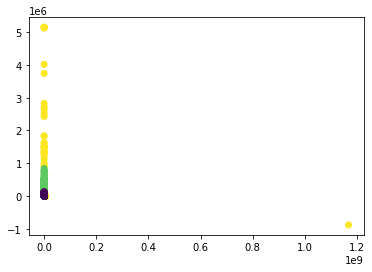

In [59]:
import matplotlib.pyplot as plt

# plt.plot(pca_2_x)

# pca_2_y[pca_2_y ==1]
# for i in pca_2_y:
#     if pca_2_y_pred[i]:
#         plt.scatter(pca_2_x[i,0],pca_2_x[i,1], color='b')
#     else:
#         plt.scatter(pca_2_x[i,0],pca_2_x[i,1], color='r')

# np.concatenate((pca_2_x,pca_2_y_pred),axis=1)

# pca_2_y_pred.shape

pca_i = np.column_stack((pca_2_x,pca_2_y_pred))

plt.scatter(pca_i[:,0],pca_i[:,1], c=pca_i[:,2])


In [76]:
ae = fit(train_features_raw.to_numpy(), train_labels.to_numpy(), n_components=2)
train_features = ae.encode(train_features_raw.to_numpy())
test_features = ae.encode(test_features_raw.to_numpy())
# train_features

AE(
  (encoder): Sequential(
    (0): Linear(in_features=41, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=2, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=41, bias=True)
    (3): ReLU()
  )
)
0
18429899000.0
1
12430286000.0
2
12453494000.0
3
12434855000.0
4
13029247000.0
5
15106906000.0
6
16970391000.0
7
14696108000.0
8
12438204000.0
9
17480210000.0


precision: [0.881811   0.         0.79536954 0.         0.01136364] 
recall: [1.72109965e-02 0.00000000e+00 9.99434085e-01 0.00000000e+00
 1.24455507e-04] 
F1 score: [3.37630139e-02 0.00000000e+00 8.85801004e-01 0.00000000e+00
 2.46214453e-04] 
accuracy: 0.7956345942212172


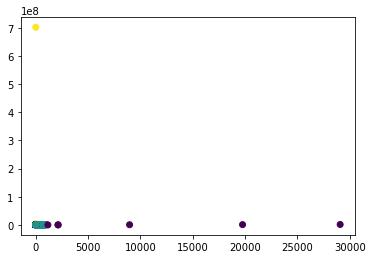

In [77]:
model = GaussianNB()
model.fit(train_features.detach().numpy(), train_labels.to_numpy())
y_pred = model.predict(test_features.detach().numpy())
# y_pred
precision, recall, F1_score, _ = precision_recall_fscore_support(test_labels, y_pred, average=None, zero_division=0)
acc = accuracy_score(test_labels, y_pred)
print("precision: {} \nrecall: {} \nF1 score: {} \naccuracy: {}".format(precision, recall, F1_score, acc))

ae_i = np.column_stack((test_features.detach().numpy(), y_pred))

plt.scatter(ae_i[:,0],ae_i[:,1], c=ae_i[:,2])